### 판다스 개요
- pandas는 데이터 조작 및 분석을 위해 python 프로그래밍 언어로 작성된 소프트웨어 라이브러리
- 특히, 숫자로 이루어진 테이블과 시계열을 다루기 위해 그에 대한 자료 구조와 조작법을 제공한다.
- URL: https://pandas.pydata.org/docs/

### pandas 불러오기
- pandas는 일반적으로 pd라는 별칭으로 불러온다.
- `pip install pandas`

  <h3>판다스의 구성요소</h3>
    <ul>
      <h3>(1) Series</h3>
      <li>DataFrame 중에서 하나의 column에 대항하는 데이터</li>
      <li>1차원 데이터 (index, values 2가지 요소를 포함)</li>
    </ul>
    <ul>
      <h3>(1) DateFrame</h3>
      <li>Data Table 전체를 의미하는 용어</li>
      <li>2차원 데이터(index, column, values 3가지 요소를 포함)</li>
    </ul>
    <ul>
      <h3>(3) index</h3>
      <li>Series, DateFrame의 index 및 column을 구성하는 이름</li>
    </ul>

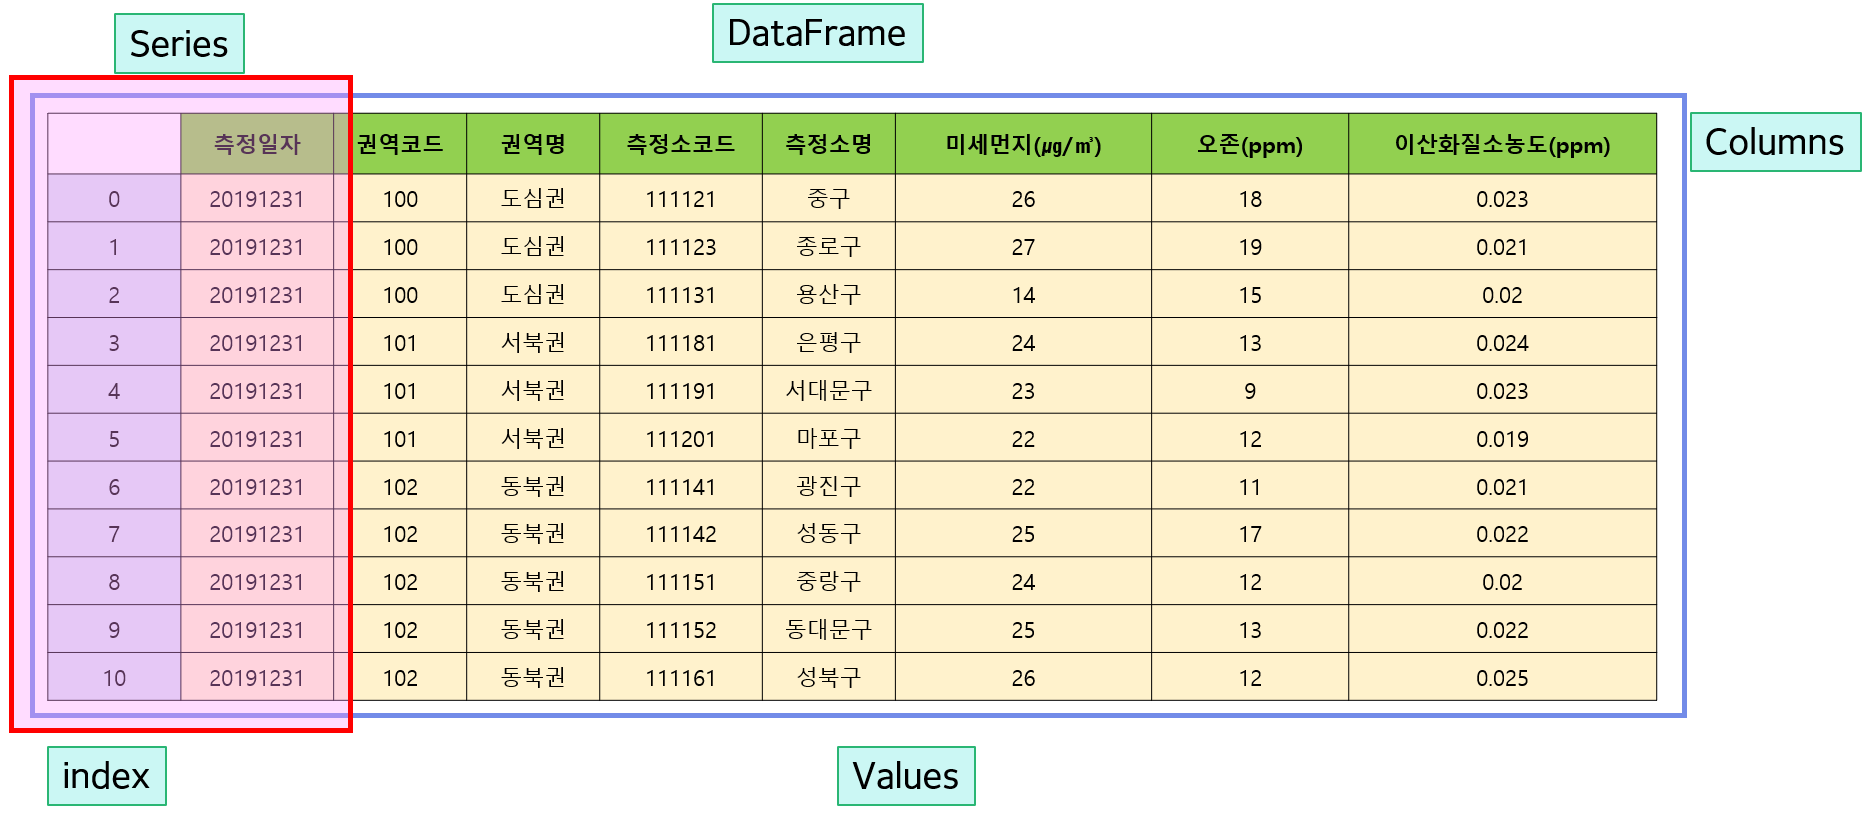

# 3.1 시리즈(Series)
### 시리즈 생성
- 시리즈는 1차원 배열과 유사하게 사용할 수 있다.
- pandas의 Serise 클래스의 생성자에 리스트를 전달하여 시리즈 객체를 생성할 수 있다.
- 리스트의 요소에 대해 인덱스가 자동으로 생성되어 시리즈 객체를 출력할 떄 자동으로 표시된다.
(명시적으로 인덱스 값을 전달할 수도 있다.)

In [9]:
import pandas as pd
import numpy as np

num_list = [2,3,5,7,9]
sr = pd.Series(num_list)

# print(sr)
# print(type(sr))

sr = pd.Series(num_list, index=list("ㅁㅈㅇㄹㅈ"))
print(sr)

ㅁ    2
ㅈ    3
ㅇ    5
ㄹ    7
ㅈ    9
dtype: int64


In [13]:
menu_list = ['토스트','제육','치킨']
index_list = ['아침','점심','저녘']

sr = pd.Series(menu_list,index=index_list)
display(sr)

아침    토스트
점심     제육
저녘     치킨
dtype: object

In [14]:
# 인덱스와 값만 가져올 수도 있다.
print(sr.index) # 결과가 Index객체
print(sr.index.values) # 결과가 ndarray 객체
print(sr.values) # 결과가 ndarray 객체

Index(['아침', '점심', '저녘'], dtype='object')
['아침' '점심' '저녘']
['토스트' '제육' '치킨']


In [20]:
# 딕셔너리를 이용해서 Series 생성하기
dic_data = {'a':"21",'b':"22",'c':"23","d":"24"}
sr = pd.Series(dic_data, name='mySeries')
print(sr)

a    21
b    22
c    23
d    24
Name: mySeries, dtype: object


# 3.1.2 원소선택

In [21]:
print(sr[0])
# 키로도 검색가능
print(sr['a'])
# TODO 불리언 인덱싱가능
print(sr[0:2])
# 복수계 값을 선택
print("어딨니?",sr[[0,2]])
# 인덱스의 이름으로 슬라이싱을 하면 마지막 값을 포함한다.
print(sr['a':'c'])

21
21
a    21
b    22
Name: mySeries, dtype: object
어딨니? a    21
c    23
Name: mySeries, dtype: object
a    21
b    22
c    23
Name: mySeries, dtype: object


### unique(), value_counts()
- np에서 사용한 unique와 똑같은 기능
- sr.unique(): `결측치를 포함하며` 중복을 제외한 데이터의 종류를 ndarray로 반환
- sr.value_counts(): `결측치를 포함하지 않으며` 데이터의 종류별 개수를 Series객체로 반환 (범주형자료에 적합)
- 결측치 : 값이없는 상황

In [30]:
sr = pd.Series(['A','B','A',np.NaN, 'C','D','D','A'])
print(sr.unique())
print('-'*50)
print(sr.value_counts())

['A' 'B' nan 'C' 'D']
--------------------------------------------------
A    3
D    2
B    1
C    1
Name: count, dtype: int64


# 3.2 데이터프레임(DataFrame)
### 데이터 프레임 생성
- 데이터프레임은 2차원 배열과 유사하게 사용할 수 있다.
- pandas의 DataFrame 클래스의 생성자에 `이중 리스트`(또는 `딕셔너리`)를 전달하여 데이터프레임 객체를 생성할 수 있다.
- 리스트의 요소에 대해 인덱스와 컬럼이 자동으로 생성되어 데이터프레임 객체를 출력할 때 자동으로 표시된다.

In [32]:
nums = [[1,2,3],[4,5,6],[7,8,9]]
df = pd.DataFrame(nums)

display(df)
print(type(df))

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


<class 'pandas.core.frame.DataFrame'>


In [25]:
menu = [['토스'  ,'시리'  ,'램블'],
        ['제육'  ,'칼국'  ,'육장'],
        ['치킨'  ,'삼겹'  ,'라면']]
index = ['아침', '점심','저녘']
columns = ['월','화','수']
df = pd.DataFrame(menu,index,columns)
display(df)

,월,화,수
아침,토스,시리,램블
점심,제육,칼국,육장
저녘,치킨,삼겹,라면


In [26]:
print(df.index)
print(df.columns)
print(df.values)

Index(['아침', '점심', '저녘'], dtype='object')
Index(['월', '화', '수'], dtype='object')
[['토스' '시리' '램블']
 ['제육' '칼국' '육장']
 ['치킨' '삼겹' '라면']]


In [28]:
# 딕셔너리를 이용한 데이터프레임 생성
# 딕셔너리 키값이 인덱스 역할을 하는데 프레임에서 ㄱㄱ
raw_data = {
  '이름':['홍길동','전우치','손오공','사오정','저팔계'],
  '나이':[32      ,27      ,30      ,31      ,35],
  '전화번호':['010-1111-1111','010-1111-1112','010-1111-1113','010-1111-1114','010-1111-1115'],
  '지역':['서울','대구','용인','광주','속초'],
  }
df = pd.DataFrame(raw_data)
display(df)

,이름,나이,전화번호,지역
0,홍길동,32,010-1111-1111,서울
1,전우치,27,010-1111-1112,대구
2,손오공,30,010-1111-1113,용인
3,사오정,31,010-1111-1114,광주
4,저팔계,35,010-1111-1115,속초


# 데이터 조회 및 처리

In [32]:
import pandas as pd
import numpy as np

data = np.random.randint(100,size=(10,10))
df = pd.DataFrame(data,['A','B','C','D','E',"F"],['a','b','c','d','e'])

display(df)

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78
E,37,3,30,65,59


### 4.1 간략한 데이터 조회
### 열 값 읽기
- df[열명] / df.열명

In [35]:
# 하나의 컬럼만 뽑아내서 Series
print(df.a)
print('-'*50)
print(df['a'])
print(type(df.a))

A    47
B    78
C    87
D    26
E    37
Name: a, dtype: int64
--------------------------------------------------
A    47
B    78
C    87
D    26
E    37
Name: a, dtype: int64
<class 'pandas.core.series.Series'>


In [37]:
# 하나이상의 값을 추출하는거기떄문에 하나더라도 시리즈로 반환하는게 아닌 프레임으로 반환됨
print(df[['a','c']])
print(type(df[['a']]))

    a   c
A  47   1
B  78  37
C  87  96
D  26  82
E  37  30
<class 'pandas.core.frame.DataFrame'>


### 행 값 읽기
- df.loc[행명]
- df.iloc[행번호]

In [126]:
df.loc['A']
print("d")

d


In [45]:
# 여러개의 행 값 읽기: 행 이름을 리스트로 전달
df.loc[list("ABCD")]

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78


In [56]:
print(df.iloc[3])
print(type(df.iloc[3]))

a    26
b    54
c    82
d    21
e    78
Name: D, dtype: int64
<class 'pandas.core.series.Series'>


### df.head(),df.tail()
- 상위(하위) n개의 행을 조회한다.
- 매개변수로 값을 전달하지 않으면 5개의 행을 선택한다.

In [61]:
df.head(3)

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10


In [60]:
df.tail(2)

,a,b,c,d,e
D,26,54,82,21,78
E,37,3,30,65,59


In [62]:
# sample(): n행의 랜덤 데이터 추출
df.sample(2)

,a,b,c,d,e
C,87,17,96,37,10
E,37,3,30,65,59


# 4.1.4 데이터 정보 조회
### 컬럼별 데이터 타입 조회


In [63]:
print(df.dtypes)
print(df.shape)

a    int64
b    int64
c    int64
d    int64
e    int64
dtype: object
(5, 5)


In [64]:
# 데이터의 컬럼마다 개수를 시리즈 형태로 반환
print(df.count())

a    5
b    5
c    5
d    5
e    5
dtype: int64


In [65]:
# 기술통계 정보 요약
print(df.describe())

               a          b          c          d          e
count   5.000000   5.000000   5.000000   5.000000   5.000000
mean   55.000000  39.000000  49.200000  32.400000  46.800000
std    26.372334  32.132538  39.073009  21.019039  38.009209
min    26.000000   3.000000   1.000000   9.000000   3.000000
25%    37.000000  17.000000  30.000000  21.000000  10.000000
50%    47.000000  36.000000  37.000000  30.000000  59.000000
75%    78.000000  54.000000  82.000000  37.000000  78.000000
max    87.000000  85.000000  96.000000  65.000000  84.000000


# 4.2 인덱싱, 슬라이싱

In [66]:
display(df)

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78
E,37,3,30,65,59


### 인덱싱과 슬라이싱을 이용한 데이터 추출
- 열의 이름이나 목록을 이용해서 열 값을 인덱싱 할 수 있다.
- 열의 순서를 이용해서 인덱싱을 할 수 없다.

In [98]:
df['a']

A    47
B    78
C    87
D    26
E    37
Name: a, dtype: int64

- 이거 안됨 이름으로 인식함
- df[0]

- 열 위치 값을 인덱싱이나 슬라이싱에 적용하려면 colums 속성을 이용해야 한다.

In [103]:
df[df.columns[0:2]]

,a,b
A,47,36
B,78,85
C,87,17
D,26,54
E,37,3


- 행의 이름(또는 위치값)을 이용해서 인덱싱과 슬라이싱을 할 수 있다.
- 행의 이름으로 슬라이싱을 할 경우에는 `마지막 요소`까지 포함

In [105]:
df['A':'D']



,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84


In [106]:
df[1:4]

,a,b,c,d,e
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78


# 4.2.2 df.at, df.iat
- 라벨 또는 인덱스를 이용해서 특정 위치의 데이터를 가져온다.(단일값 추출)

In [107]:
display(df)

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78
E,37,3,30,65,59


In [110]:
df.at["B","b"]

85

In [114]:
df.iat[0,3]

30

### df.loc, df.iloc
- 행과 열을 지정해서 데이터를 선택할 수 있다.
  - df.loc[ [행이름],[열이름] ]
  - df.iloc[ [행인덱스], [열인덱스] ]

In [115]:
display(df)

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78
E,37,3,30,65,59


In [122]:
# at과 비슷할수 있지만 여러개의 열과 행을 지정할수있는것이 다르다
print(df.loc['A','a'])

47


In [121]:
df.loc[['B','C','A','B','B'],['b','a','c','a']]


,b,a,c,a
B,85,78,37,78
C,17,87,96,87
A,36,47,1,47
B,85,78,37,78
B,85,78,37,78


In [140]:
df.loc[ 'A':'C' , 'a':'b' ]

,a,b
A,47,36
B,78,85
C,87,17


### 4.2.4 조건 인덱싱

In [141]:
df

,a,b,c,d,e
A,47,36,1,30,3
B,78,85,37,9,84
C,87,17,96,37,10
D,26,54,82,21,78
E,37,3,30,65,59


In [142]:
# a열의 요소 중 50을 초과하는 값이 있을 때 해당 값의 행을 선택
df[df['a'] > 50]

,a,b,c,d,e
B,78,85,37,9,84
C,87,17,96,37,10


In [144]:
df.loc[:, df.loc['B']> 50 ]

,a,b,e
A,47,36,3
B,78,85,84
C,87,17,10
D,26,54,78
E,37,3,59


In [153]:
df[df % 2 == 0]

a    104.0
b     90.0
c    208.0
d     30.0
e    172.0
dtype: float64

In [156]:
df2 = df.copy()
df2['ㅗ'] = ['one','two','one','two','one']
df2

,a,b,c,d,e,ㅗ
A,47,36,1,30,3,one
B,78,85,37,9,84,two
C,87,17,96,37,10,one
D,26,54,82,21,78,two
E,37,3,30,65,59,one


In [162]:
df2[df2['ㅗ'].isin(['one','two'])]

,a,b,c,d,e,ㅗ
A,47,36,1,30,3,one
B,78,85,37,9,84,two
C,87,17,96,37,10,one
D,26,54,82,21,78,two
E,37,3,30,65,59,one


# 5/8일 수업

In [11]:
import pandas as pd
import numpy as np

data = np.random.randint(100,size=(10,10))
df = pd.DataFrame(data,['A','B','C','D','E',"F","G","H","I","J"],['a','b','c','d','e',"f","g","h","i","j"])

display(df)

,a,b,c,d,e,f,g,h,i,j
A,19,16,35,78,27,62,66,27,15,79
B,6,42,76,12,12,28,9,7,91,80
C,77,56,76,72,1,43,19,26,77,65
D,52,83,64,0,60,70,46,22,56,44
E,16,30,0,72,71,20,25,83,83,93
F,5,34,83,58,73,17,14,96,45,59
G,75,60,92,50,44,27,76,96,69,0
H,87,59,14,34,85,41,85,88,76,70
I,82,54,36,29,48,50,21,91,52,16
J,99,53,52,7,64,47,59,55,12,86


  - 인덱싱과 슬라이싱을 통해 선택된 위치에 값을 대입하여 데이터를 수정할 수 있다.

In [13]:
df['e'] = df['f'] = df['h']=0
df

,a,b,c,d,e,f,g,h,i,j
A,19,16,35,78,0,0,66,0,15,79
B,6,42,76,12,0,0,9,0,91,80
C,77,56,76,72,0,0,19,0,77,65
D,52,83,64,0,0,0,46,0,56,44
E,16,30,0,72,0,0,25,0,83,93
F,5,34,83,58,0,0,14,0,45,59
G,75,60,92,50,0,0,76,0,69,0
H,87,59,14,34,0,0,85,0,76,70
I,82,54,36,29,0,0,21,0,52,16
J,99,53,52,7,0,0,59,0,12,86


In [6]:
df['E':'H'] = 0
df

,a,b,c,d,e,f,g,h,i,j
A,34,51,4,29,0,0,37,0,76,17
B,67,47,97,49,0,0,97,0,30,94
C,13,6,94,65,0,0,71,0,25,63
D,82,90,6,38,0,0,54,0,96,84
E,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0
I,85,89,84,37,0,0,82,0,23,85
J,69,72,12,0,0,0,10,0,41,56


In [14]:
df.at['E','e']= 1
df

,a,b,c,d,e,f,g,h,i,j
A,19,16,35,78,0,0,66,0,15,79
B,6,42,76,12,0,0,9,0,91,80
C,77,56,76,72,0,0,19,0,77,65
D,52,83,64,0,0,0,46,0,56,44
E,16,30,0,72,1,0,25,0,83,93
F,5,34,83,58,0,0,14,0,45,59
G,75,60,92,50,0,0,76,0,69,0
H,87,59,14,34,0,0,85,0,76,70
I,82,54,36,29,0,0,21,0,52,16
J,99,53,52,7,0,0,59,0,12,86


In [15]:
df.loc['D':'G','d':'g'] = -2
df

,a,b,c,d,e,f,g,h,i,j
A,19,16,35,78,0,0,66,0,15,79
B,6,42,76,12,0,0,9,0,91,80
C,77,56,76,72,0,0,19,0,77,65
D,52,83,64,-2,-2,-2,-2,0,56,44
E,16,30,0,-2,-2,-2,-2,0,83,93
F,5,34,83,-2,-2,-2,-2,0,45,59
G,75,60,92,-2,-2,-2,-2,0,69,0
H,87,59,14,34,0,0,85,0,76,70
I,82,54,36,29,0,0,21,0,52,16
J,99,53,52,7,0,0,59,0,12,86


### 4.4 데이터 정렬 
- df.sort_values(): 행 또는 열을 지정해서 `값에 따라 정렬` 한다.
- 기본 값은 열을 지정해서 값에 따라 오름차순으로 정렬한다.


In [20]:
df.sort_values(by='a' ,axis=0)

,a,b,c,d,e,f,g,h,i,j
F,5,34,83,-2,-2,-2,-2,0,45,59
B,6,42,76,12,0,0,9,0,91,80
E,16,30,0,-2,-2,-2,-2,0,83,93
A,19,16,35,78,0,0,66,0,15,79
D,52,83,64,-2,-2,-2,-2,0,56,44
G,75,60,92,-2,-2,-2,-2,0,69,0
C,77,56,76,72,0,0,19,0,77,65
I,82,54,36,29,0,0,21,0,52,16
H,87,59,14,34,0,0,85,0,76,70
J,99,53,52,7,0,0,59,0,12,86


- 행을 지정해서 정렬하려면 `axis` 인수에 1 또는 'columns'를 지정한다.

In [21]:
df.sort_values('A',axis=1)

,e,f,h,i,b,a,c,g,d,j
A,0,0,0,15,16,19,35,66,78,79
B,0,0,0,91,42,6,76,9,12,80
C,0,0,0,77,56,77,76,19,72,65
D,-2,-2,0,56,83,52,64,-2,-2,44
E,-2,-2,0,83,30,16,0,-2,-2,93
F,-2,-2,0,45,34,5,83,-2,-2,59
G,-2,-2,0,69,60,75,92,-2,-2,0
H,0,0,0,76,59,87,14,85,34,70
I,0,0,0,52,54,82,36,21,29,16
J,0,0,0,12,53,99,52,59,7,86


- 내림차순으로 정렬하려면 ascending 인수에 False를 전달한다.

In [23]:
df.sort_values('b',axis=0,ascending=False)
# df.sort_values('A',axis=1,ascending=False)

,a,b,c,d,e,f,g,h,i,j
D,52,83,64,-2,-2,-2,-2,0,56,44
G,75,60,92,-2,-2,-2,-2,0,69,0
H,87,59,14,34,0,0,85,0,76,70
C,77,56,76,72,0,0,19,0,77,65
I,82,54,36,29,0,0,21,0,52,16
J,99,53,52,7,0,0,59,0,12,86
B,6,42,76,12,0,0,9,0,91,80
F,5,34,83,-2,-2,-2,-2,0,45,59
E,16,30,0,-2,-2,-2,-2,0,83,93
A,19,16,35,78,0,0,66,0,15,79


- df.sort_index(): 행또는 열에 대해 정렬한다.
- 기본 값은 인덱스를 오름차순으로 정렬하는 것이다.
- 컬럼명을 따라 내림차순으로 정렬하려면 axis 인수와 ascending 인수를 설정한다.

In [26]:
df.sort_index(ascending=False)

,a,b,c,d,e,f,g,h,i,j
J,99,53,52,7,0,0,59,0,12,86
I,82,54,36,29,0,0,21,0,52,16
H,87,59,14,34,0,0,85,0,76,70
G,75,60,92,-2,-2,-2,-2,0,69,0
F,5,34,83,-2,-2,-2,-2,0,45,59
E,16,30,0,-2,-2,-2,-2,0,83,93
D,52,83,64,-2,-2,-2,-2,0,56,44
C,77,56,76,72,0,0,19,0,77,65
B,6,42,76,12,0,0,9,0,91,80
A,19,16,35,78,0,0,66,0,15,79


In [27]:
# df.sort_index(axis=1,ascending=False)
df.sort_index(axis='columns',ascending=False)

,a,b,c,d,e,f,g,h,i,j
J,99,53,52,7,0,0,59,0,12,86
I,82,54,36,29,0,0,21,0,52,16
H,87,59,14,34,0,0,85,0,76,70
G,75,60,92,-2,-2,-2,-2,0,69,0
F,5,34,83,-2,-2,-2,-2,0,45,59
E,16,30,0,-2,-2,-2,-2,0,83,93
D,52,83,64,-2,-2,-2,-2,0,56,44
C,77,56,76,72,0,0,19,0,77,65
B,6,42,76,12,0,0,9,0,91,80
A,19,16,35,78,0,0,66,0,15,79


# 데이터 프레임 조작
### 새로운 행 또는 열 추가
- DataFrame에 새로운 열 추가
  - df['컬럼명'] = 데이터 목록
  - 컬럼명은 기존 DataFrame에 존재하지 않는 이름이어야 한다.
  - 데이터 목록은 기존 DataFrame의 다른 컬럼들과 같은 개수이어야 하며
  - list, Series 등의 형태일 수 있음
- DataFrame에 새로운 행 추가
  - df.loc['컬럼명'] = 데이터 목록
  - 데이터 목록은 기존 DateFrame의 컬럼의 갯수와 `타입이 같아야` 한다.

In [47]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1,2,3],[7,8,9],[13,14,15]],
                  index=list('ABC'),columns=list('abc'))
df


,a,b,c
A,1,2,3
B,7,8,9
C,13,14,15


### 5.1.1 리스트를 이용해서 새로운 행 또는 열 추가

In [48]:
# 새로운 행 추가
df.loc['D'] = [19,20,21]
df

,a,b,c
A,1,2,3
B,7,8,9
C,13,14,15
D,19,20,21


In [49]:
# 새로운 열  추가
df['d'] = [4,10,16,22]
df

,a,b,c,d
A,1,2,3,4
B,7,8,9,10
C,13,14,15,16
D,19,20,21,22


### 5.1.2 ndarray 이용해서 새로운 행 또는 열 추가

In [50]:
df.loc['E'] = np.array([25,25,27,28])
df

,a,b,c,d
A,1,2,3,4
B,7,8,9,10
C,13,14,15,16
D,19,20,21,22
E,25,25,27,28


In [51]:
df['e'] = np.array([5,11,17,23,29])
df

,a,b,c,d,e
A,1,2,3,4,5
B,7,8,9,10,11
C,13,14,15,16,17
D,19,20,21,22,23
E,25,25,27,28,29


### 시리즈를 이용해서 새로운 행 또는 열 추가
- 시리즈를 이용해서 행 또는 열을 추가할 때는 기존 DataFrame과 `같은 인덱스를 갖도록` 작성한다.
- 인덱스를 정확하게 명시하지 않으면 추가되는 데이터는 NaN으로 초기화 된다.

In [52]:
df.loc['F'] = pd.Series([31,32,33,34,35], df.columns)
df

,a,b,c,d,e
A,1,2,3,4,5
B,7,8,9,10,11
C,13,14,15,16,17
D,19,20,21,22,23
E,25,25,27,28,29
F,31,32,33,34,35


In [56]:
# 인덱스 정보가 들어가야됨
df['f'] = pd.Series([6,12,18,24,30,36],df.index)
df

,a,b,c,d,e,f
A,1,2,3,4,5,6
B,7,8,9,10,11,12
C,13,14,15,16,17,18
D,19,20,21,22,23,24
E,25,25,27,28,29,30
F,31,32,33,34,35,36


In [57]:
# 인덱스 정보가 들어가야됨 안넣으면 NaN(결측)
df.loc['G'] = pd.Series([11,22,33,44,55,66])
df

,a,b,c,d,e,f
A,1.0,2.0,3.0,4.0,5.0,6.0
B,7.0,8.0,9.0,10.0,11.0,12.0
C,13.0,14.0,15.0,16.0,17.0,18.0
D,19.0,20.0,21.0,22.0,23.0,24.0
E,25.0,25.0,27.0,28.0,29.0,30.0
F,31.0,32.0,33.0,34.0,35.0,36.0
G,NaN,NaN,NaN,NaN,NaN,NaN


### 임의의 위치에 열을 삽입
- df.insert(위치, 컬럼명, 값)

In [78]:
df.insert(1,'k',[2,2,2,2,2,2,2])
df

,a,k,b,c,d,e,f
A,1.0,2,2.0,3.0,4.0,5.0,6.0
B,7.0,2,8.0,9.0,10.0,11.0,12.0
C,13.0,2,14.0,15.0,16.0,17.0,18.0
D,19.0,2,20.0,21.0,22.0,23.0,24.0
E,25.0,2,25.0,27.0,28.0,29.0,30.0
F,31.0,2,32.0,33.0,34.0,35.0,36.0
G,NaN,2,NaN,NaN,NaN,NaN,NaN


In [80]:
df.loc['H'] = ['a','a','a','a','a','a','a']
df

,a,k,b,c,d,e,f
A,1.0,2,2.0,3.0,4.0,5.0,6.0
B,7.0,2,8.0,9.0,10.0,11.0,12.0
C,13.0,2,14.0,15.0,16.0,17.0,18.0
D,19.0,2,20.0,21.0,22.0,23.0,24.0
E,25.0,2,25.0,27.0,28.0,29.0,30.0
F,31.0,2,32.0,33.0,34.0,35.0,36.0
G,NaN,2,NaN,NaN,NaN,NaN,NaN
H,a,a,a,a,a,a,a


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      float64
 1   b       6 non-null      float64
 2   c       6 non-null      float64
 3   d       6 non-null      float64
 4   e       6 non-null      float64
 5   f       6 non-null      float64
dtypes: float64(6)
memory usage: 392.0+ bytes


### 5.2 행/열의 변경

In [74]:
df= pd.DataFrame(np.arange(1,10).reshape(3,3),columns=list('abc'))
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


- df.reindex(): 새로운 행 또는 열을 추가하거나 삭제, 순서변경을 할 수 있다.
- 추가되는 행 또는 열의 요소는 NaN으로 초기화 된다.
- 실행 결과는 원본에 영향을 주지 않고 `새로운 데이터 프레임 객체를 반환`한다.

In [75]:
# 원본은 영향없음
df.reindex(index=[0,1,2,3],columns=list('abcd'))

,a,b,c,d
0,1.0,2.0,3.0,NaN
1,4.0,5.0,6.0,NaN
2,7.0,8.0,9.0,NaN
3,NaN,NaN,NaN,NaN


- 행 또는 열의 순서를 임의로 섞을 수도 있다.
- 기존에 존재하던 라벨을 일부러 생략해서 행 또는 열을 제거할 수도 있다.


In [76]:
df.reindex(index=[0,3,2,3,3],columns=['a','d','d','d','d'])

,a,d,d,d,d
0,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
2,7.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


- df.set_index(): 인덱스를 세팅한다.
- 열을 인덱스로 만든다.
- df.set_index(컬럼이름, inplace=True): inplace=True는 원본 데이터 변경 옵션

In [77]:
# 원본에 영향안줌

df


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [78]:
df.set_index('b')

,a,c
b,,
2,1,3
5,4,6
8,7,9


In [82]:
# inplace 원본에 반영
df.set_index('a',inplace=True)

In [84]:
df

,b,c
a,,
1,2,3
4,5,6
7,8,9


- df.reset_index(): 인덱스 초기화
- drop = True 인수를 전달하면 기존 인덱스를 삭제하고 기본 값으로 다시 초기화 한다.
- 인덱스를 열 데이터로 추가

In [85]:
df = df.reset_index()
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [108]:
df.reset_index(drop=True,inplace=True)

In [109]:
df

,b,c
0,2,3
1,5,6
2,8,9


## 행 / 열의 삭제
### DateFrame의 열 삭제
  - del df['열이름']
  - df.drop('열이름', axis=1), df.drop(['열이름1', '열이름2...'], axis=1)
  - df.drop(columns=['열이름...'])
### DateFrame의 행 삭제
  - df.drop('행이름'),  df.drop(['행이름1','행이름2..'])
  - axis=0 이 기본 값이므로 생략할 수 있다.
  - df.drop(row=['행이름...'])

### 실행 결과는 원본에 영향을 주지 않고, 새로운 데이터 프레임 객체를 반환한다.
- inplace=True 속성을 이용해서 원본을 직접 변경할 수 있다.

In [86]:
df = pd.DataFrame([[1,2],[3,4]], index=list('AB') ,columns=list('ab'))
df

,a,b
A,1,2
B,3,4


In [87]:
df.drop('B',axis=0)

,a,b
A,1,2


In [88]:
df.drop('b',axis=1)

,a
A,1
B,3


### 5.4 행 / 열 이름 바꾸기

In [89]:
df = pd.DataFrame(np.random.randint(1,100,(4,4)))
df

,0,1,2,3
0,87,8,28,23
1,54,57,60,60
2,32,80,52,85
3,45,94,3,81


In [90]:
# 행/열 이름 바꾸기
df.columns= ['C1','C2','C3','C4']
df.index = list('abcd')
df

,C1,C2,C3,C4
a,87,8,28,23
b,54,57,60,60
c,32,80,52,85
d,45,94,3,81


### 특정 행/열의 이름만 바꾸기
- df.rename(index=dictionary_obj)
- df.rename(columns=dictionary_obj)

In [91]:
df.rename(index={'a':'A'},inplace=True)
df.rename(columns={'C1':'국어'},inplace=True)
df

,국어,C2,C3,C4
A,87,8,28,23
b,54,57,60,60
c,32,80,52,85
d,45,94,3,81


### 컬럼 이름 특정 문자 변경하기

In [99]:
df.index = list('ABCD')
df.columns = ['1기 A반','1기 B반','2기 A반','2기 B반']
df

,1기 A반,1기 B반,2기 A반,2기 B반
A,87,8,28,23
B,54,57,60,60
C,32,80,52,85
D,45,94,3,81


- `str` 모듈은 문자열을 다루는 함수를 가지고 있다.

In [100]:
df.columns = df.columns.str.replace(' ','-')
df

,1기-A반,1기-B반,2기-A반,2기-B반
A,87,8,28,23
B,54,57,60,60
C,32,80,52,85
D,45,94,3,81


### 컬럼명에 접두사 및 접미사 붙이기
- df.add_prefix()
- df.add_suffix()

In [101]:
# 원본에 영향없음
# df.add_prefix('KDT')
df = df.add_prefix('KDT')
df

,KDT1기-A반,KDT1기-B반,KDT2기-A반,KDT2기-B반
A,87,8,28,23
B,54,57,60,60
C,32,80,52,85
D,45,94,3,81


In [102]:
# 원본에 영향없음
df = df.add_suffix('_재학')
df

,KDT1기-A반_재학,KDT1기-B반_재학,KDT2기-A반_재학,KDT2기-B반_재학
A,87,8,28,23
B,54,57,60,60
C,32,80,52,85
D,45,94,3,81


In [110]:
### 5.5 데이터 프레임 간의 조합
df = pd.DataFrame([[1,2],[3,4]],index=['A','B'],columns=['a','b'])
df

,a,b
A,1,2
B,3,4


### pd.concat():
- 두 개 이상의 데이터 프레임 객체를 행 또는 열 방향으로 연결한다.
- 열 방향으로 연결하고자 할 경우 axis=1 인자를 전달한다.
- 실행 결과는 원본에 영향을 주지 않고 새로운 데이터 프레임 객체를 반환한다.
- ignore_index 인자의 값을 True로 전달하여 추가할 객체의 인덱스를 무시할 수 있다.

In [111]:
df2 = pd.concat([df,df],axis=0)
df2

,a,b
A,1,2
B,3,4
A,1,2
B,3,4


In [112]:
df3 = pd.DataFrame([[5,6],[7,8]], index=df.index, columns=['a','b'])
df4 = pd.concat([df,df3],axis=1)
df4

,a,b,a,b
A,1,2,5,6
B,3,4,7,8


# 통계

In [113]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(100,size=(10,10)),
                    index=list('ABCDEFGHIJ'),columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
A,47,3,9,89,33,88,59,46,17,98
B,15,68,96,65,98,84,81,47,56,56
C,16,65,46,99,40,41,88,72,47,48
D,39,57,4,2,58,2,56,91,43,44
E,30,62,99,58,1,10,9,8,21,61
F,9,68,1,7,49,41,11,34,86,61
G,79,14,93,81,90,60,76,45,53,96
H,7,33,23,34,1,83,10,34,52,28
I,99,76,52,33,98,78,13,57,65,89
J,69,60,64,11,98,68,57,53,69,26


### 6.1 df.describe()
- 각 열에 대한 주요 통계 수치들을 확인한다.

In [114]:
df.describe()

,a,b,c,d,e,f,g,h,i,j
count,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,41.000000,50.600000,48.7000,47.900000,56.600000,55.500000,46.000000,48.700000,50.90000,60.700000
std,32.031235,25.016439,38.7185,35.507276,38.488671,31.020602,32.072834,22.440291,20.84573,26.191814
min,7.000000,3.000000,1.0000,2.000000,1.000000,2.000000,9.000000,8.000000,17.00000,26.000000
25%,15.250000,39.000000,12.5000,16.500000,34.750000,41.000000,11.500000,36.750000,44.00000,45.000000
50%,34.500000,61.000000,49.0000,46.000000,53.500000,64.000000,56.500000,46.500000,52.50000,58.500000
75%,63.500000,67.250000,85.7500,77.000000,96.000000,81.750000,71.750000,56.000000,62.75000,82.000000
max,99.000000,76.000000,99.0000,99.000000,98.000000,88.000000,88.000000,91.000000,86.00000,98.000000


### 6.2 df.count()
- 각 행/열에 대한 요소의 개수를 산출한다.

In [115]:
# 각 행의 요소의 개수 확인
df.count(axis=1)
df.count(axis=1)

A    10
B    10
C    10
D    10
E    10
F    10
G    10
H    10
I    10
J    10
dtype: int64

In [117]:
# 각 열의 요소의 개수를 확인
df.count(axis=0)

a    10
b    10
c    10
d    10
e    10
f    10
g    10
h    10
i    10
j    10
dtype: int64

### 6.3 df.mean()
- 각 행/열에 대한 평균을 산출한다.

In [118]:
df.mean()

a    41.0
b    50.6
c    48.7
d    47.9
e    56.6
f    55.5
g    46.0
h    48.7
i    50.9
j    60.7
dtype: float64

### 6.4 df.std()
- 각 행/열에 대한 표준편차를 산출한다.
### 6.5 df.min(), df.max()
- 각 행/열에 대한 최소/최대값을 산출한다.

In [119]:
df.std(axis=0)

a    32.031235
b    25.016439
c    38.718500
d    35.507276
e    38.488671
f    31.020602
g    32.072834
h    22.440291
i    20.845730
j    26.191814
dtype: float64

### [문제] Series, Dataframe

In [120]:
import pandas as pd
import numpy as np
name = ['홍','임','전','손','저','사']
전공 = pd.Series(['컴공','수학','정통','수학','컴공','컴공'],index=name)
수학 = pd.Series([97,88,91,76,88,87], index=name)
국어 = pd.Series([88,89,85,90,88,77], index=name)
영어 = pd.Series([90,100,96,91,80,90], index=name)
df = pd.DataFrame({'전공': 전공, '수학': 수학, '국어': 국어, '영어': 영어})
df

,전공,수학,국어,영어
홍,컴공,97,88,90
임,수학,88,89,100
전,정통,91,85,96
손,수학,76,90,91
저,컴공,88,88,80
사,컴공,87,77,90


In [121]:
df.info()
df.shape
df.head(2)
df.describe()

pd.__version__

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 홍 to 사
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전공      6 non-null      object
 1   수학      6 non-null      int64 
 2   국어      6 non-null      int64 
 3   영어      6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 240.0+ bytes


'2.0.1'

In [122]:
df['합계'] = df.loc[:,"수학":"영어"].sum(axis=1)
df

,전공,수학,국어,영어,합계
홍,컴공,97,88,90,275
임,수학,88,89,100,277
전,정통,91,85,96,272
손,수학,76,90,91,257
저,컴공,88,88,80,256
사,컴공,87,77,90,254


In [125]:
# df['평균'] = df.loc[:,"수학":"영어"].mean(axis=1)
df['평균'] = df.loc[:,['수학','국어','영어']].mean(axis=1)
df

,전공,수학,국어,영어,합계,평균
홍,컴공,97,88,90,275,91.666667
임,수학,88,89,100,277,92.333333
전,정통,91,85,96,272,90.666667
손,수학,76,90,91,257,85.666667
저,컴공,88,88,80,256,85.333333
사,컴공,87,77,90,254,84.666667


In [235]:
df['평균'] = df['평균'].astype(float)

In [126]:
# df['평균'] = df['평균'].apply(lambda x:'{:.2f}'.format(x))
df['평균'] = df['평균'].apply(lambda x: np.round(x,2))
# df['평균'] = df['평균'].round(2)
df

,전공,수학,국어,영어,합계,평균
홍,컴공,97,88,90,275,91.67
임,수학,88,89,100,277,92.33
전,정통,91,85,96,272,90.67
손,수학,76,90,91,257,85.67
저,컴공,88,88,80,256,85.33
사,컴공,87,77,90,254,84.67


In [223]:
df.drop('합계', axis=1, inplace=True)
df.drop('평균', axis=1, inplace=True)

# 7. 결측값 처리

In [127]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(0,10,(5,5)),
                index=list('ABCDE'),columns=list('abcde'))
#결측값 설정
df.loc['B','c'] = None
df.loc['D','e'] = np.nan
df

,a,b,c,d,e
A,4,3,8.0,0,5.0
B,2,2,NaN,1,5.0
C,0,4,8.0,0,5.0
D,8,0,1.0,7,NaN
E,0,5,6.0,3,3.0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5 non-null      int64  
 1   b       5 non-null      int64  
 2   c       4 non-null      float64
 3   d       5 non-null      int64  
 4   e       4 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 412.0+ bytes


### df.isna(), df.notna()
- 데이터가 NaN인지 아닌지 검사한다.

In [131]:
# bool타입으로 반환
# checked_df = df.isna()
# 데이터 수 확인
checked_df = df.isna().sum()
checked_df

,a,b,c,d,e
A,False,False,False,False,False
B,False,False,True,False,False
C,False,False,False,False,False
D,False,False,False,False,True
E,False,False,False,False,False


In [130]:
checked_df2 = df.notna()
# checked_df2 = df.notna().sum()
checked_df2

,a,b,c,d,e
A,True,True,True,True,True
B,True,True,False,True,True
C,True,True,True,True,True
D,True,True,True,True,False
E,True,True,True,True,True


### df.dropna()
- 행 또는 열에 대해 결측값을 제거한다.
- 기본 설정은 결측값이 존재하는 `행을 모두 제거`하는 방식이다.

In [132]:
cleared_row_df = df.dropna(axis=0)
cleared_row_df

,a,b,c,d,e
A,4,3,8.0,0,5.0
C,0,4,8.0,0,5.0
E,0,5,6.0,3,3.0


- axis 인수를 설정하면 결측값이 있는 열을 선택해서 제거할 수 있다.

In [245]:
cleared_row_df = df.dropna(axis=1)
cleared_row_df

,a,b,d
A,2,0,4
B,7,8,5
C,6,7,3
D,8,0,6
E,1,2,1


### df.fillna()
- 결측 값을 다른 값으로 채운다.

In [133]:
filled_df = df.fillna(-9999)
filled_df

,a,b,c,d,e
A,4,3,8.0,0,5.0
B,2,2,-9999.0,1,5.0
C,0,4,8.0,0,5.0
D,8,0,1.0,7,-9999.0
E,0,5,6.0,3,3.0


In [135]:
### 결측치 값을 해당 컬럼의 평균 값으로 채우기
display(df)
df['c'] = df['c'].fillna(df['c'].mean())
df

,a,b,c,d,e
A,4,3,8.00,0,5.0
B,2,2,5.75,1,5.0
C,0,4,8.00,0,5.0
D,8,0,1.00,7,NaN
E,0,5,6.00,3,3.0


,a,b,c,d,e
A,4,3,8.00,0,5.0
B,2,2,5.75,1,5.0
C,0,4,8.00,0,5.0
D,8,0,1.00,7,NaN
E,0,5,6.00,3,3.0


- method 인자를 전달하면 열 기준 바로 앞/뒤에 있는 값으로 채울 수도 있다.
- method = 'ffill': 앞의 값으로 채운다.
- method = 'backfill':  뒤의 값으로 채운다.

In [136]:
filled_df2 = df.fillna(method='ffill')
filled_df2

,a,b,c,d,e
A,4,3,8.00,0,5.0
B,2,2,5.75,1,5.0
C,0,4,8.00,0,5.0
D,8,0,1.00,7,5.0
E,0,5,6.00,3,3.0


In [137]:
filled_df3 = df.fillna(method='backfill')
filled_df3

,a,b,c,d,e
A,4,3,8.00,0,5.0
B,2,2,5.75,1,5.0
C,0,4,8.00,0,5.0
D,8,0,1.00,7,3.0
E,0,5,6.00,3,3.0


# 8. 데이터 중복 제거

In [148]:
import pandas as pd

df = pd.DataFrame({'k1':['one','two']*3 + ['two'], 'k2':[1,1,2,3,3,4,4]})
df

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


### df.duplicated()
- 각 행의 중복여부를 확인하여 True/False 값으로 알려준다.

In [149]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

### df.drop_duplicates()
- 모든 컬럼에 대해 중복된 값을 갖는 행을 제거한 데이터 프레임을 반환한다.

In [150]:
rm_duplicated = df.drop_duplicates()
rm_duplicated

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


### df.drop_duplicates(컬럼명 리스트)
- 매개변수로 주어진 컬럼명 목록에 대해 같은 값을 갖는 행을 제거한 데이터 프레임을 반환한다.

In [151]:
df['v1'] = range(7)
df

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [152]:
rm_duplicated3 = df.drop_duplicates(['k1','k2'])
rm_duplicated3

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


### keep = 'last' 파라미터
- duplicated()와 drop_duplicates()는 기본적으로 처음 발견된 값을 유지한다.
- keep = 'last' 옵션을 지정하면 마지막으로 발견된 값을 유지한다.

In [153]:
df.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


# 9. 데이터 프레임 재구조화

In [154]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(25).reshape(5,5),index=list('ABCDE'), columns=list('abcde'))
year_df = pd.DataFrame([2019,2020,2019,2020,2020],index=list('ABCDE'), columns=['year'])
class_df = pd.DataFrame(list('AABBA'),index=list('ABCDE'), columns=['class'])

df = pd.concat([df,year_df,class_df],axis=1)
df

,a,b,c,d,e,year,class
A,0,1,2,3,4,2019,A
B,5,6,7,8,9,2020,A
C,10,11,12,13,14,2019,B
D,15,16,17,18,19,2020,B
E,20,21,22,23,24,2020,A


### pd.pivot_table() (= df.pivot_table())
- 지정된 index와 column으로 피봇 테이블을 생성한다.
- 피봇 테이블: 기존 데이터를 기반으로 합계나 평균 등의 통계를 산출하기 위해 새로운 표를 만드는 기능
- pivot_table(index=행방향 컬럼, columns=열방향 컬럼, values=집계대상 컬럼,aggfunc=집계 함수명)

In [155]:
# 데이터 대해 특정 컬럼 항목으로만 정렬하고 싶을 떄 pivot_table을 사용한다.
# 그렇게 되면 해당 컬럼이 index가 되고,
# 중복된 컬럼의 항목은 하나로 합쳐지고, value 값들의 평균값을 가지게 된다.
pivot1 = pd.pivot_table(df, index='year',columns='class')
pivot1

a           b           c           d           e      
class     A     B     A     B     A     B     A     B     A     B
year                                                             
2019    0.0  10.0   1.0  11.0   2.0  12.0   3.0  13.0   4.0  14.0
2020   12.5  15.0  13.5  16.0  14.5  17.0  15.5  18.0  16.5  19.0

In [158]:
pivot2 = pd.pivot_table(df, index=['year','class'])
pivot2

a     b     c     d     e
year class                              
2019 A       0.0   1.0   2.0   3.0   4.0
     B      10.0  11.0  12.0  13.0  14.0
2020 A      12.5  13.5  14.5  15.5  16.5
     B      15.0  16.0  17.0  18.0  19.0

- 피벗 테이블을 이용한 계산
- aggfunc 속성에 집계 함수를 지정(default 평균)

In [163]:

pivot3 = pd.pivot_table(df, index='year', values=['a','b','c','d','e'])
pivot3

,a,b,c,d,e
year,,,,,
2019,5.000000,6.000000,7.000000,8.000000,9.000000
2020,13.333333,14.333333,15.333333,16.333333,17.333333


In [162]:
np.set_printoptions(suppress=True, precision=2)

In [164]:
pivot4 = pd.pivot_table(df, index='year', values=['a','b','c','d','e'], aggfunc=['sum','mean'])
pivot4 = pd.pivot_table(df, index='year', values=['a','b','c','d','e'], aggfunc=[np.sum,np.mean,np.min])
pivot4

sum                       mean                                    
       a   b   c   d   e          a          b          c          d   
year                                                                   
2019  10  12  14  16  18   5.000000   6.000000   7.000000   8.000000  \
2020  40  43  46  49  52  13.333333  14.333333  15.333333  16.333333   

                amin              
              e    a  b  c  d  e  
year                              
2019   9.000000    0  1  2  3  4  
2020  17.333333    5  6  7  8  9

### [실습] 피봇 테이블 실습
- 'benefit' 칼럼 추가: 매출('sales') - 비용('cost')
- 피봇을 활용하여 연도별 분기 이익 데이터 확인
- 연도별 이익 평균/합계 계산

In [165]:
year_sr = pd.Series([2020]*4+[2021]*4+[2022]*4)
quarter_sr = pd.Series(['1Q','2Q','3Q','4Q']*3)
np.random.seed(0)
sales_sr = pd.Series(np.random.randint(500,6000,12))
cost_sr = pd.Series(np.random.randint(100,1200,12))

df = pd.DataFrame({'year':year_sr,'quarter':quarter_sr,'sales':sales_sr,'cost':cost_sr})
df


,year,quarter,sales,cost
0,2020,1Q,3232,274
1,2020,2Q,3107,949
2,2020,3Q,2153,637
3,2020,4Q,3764,945
4,2021,1Q,5431,172
5,2021,2Q,5359,877
6,2021,3Q,1533,215
7,2021,4Q,4873,1076
8,2022,1Q,3968,855
9,2022,2Q,1205,548


In [166]:
df['benefit'] =  df['sales'] - df['cost']
df


,year,quarter,sales,cost,benefit
0,2020,1Q,3232,274,2958
1,2020,2Q,3107,949,2158
2,2020,3Q,2153,637,1516
3,2020,4Q,3764,945,2819
4,2021,1Q,5431,172,5259
5,2021,2Q,5359,877,4482
6,2021,3Q,1533,215,1318
7,2021,4Q,4873,1076,3797
8,2022,1Q,3968,855,3113
9,2022,2Q,1205,548,657


In [168]:
df_pivot = pd.pivot_table(df, index='year', columns='quarter', values='benefit')
df_pivot

quarter,1Q,2Q,3Q,4Q
year,,,,
2020,2958,2158,1516,2819
2021,5259,4482,1318,3797
2022,3113,657,2149,2436


In [169]:
df_pivot = pd.pivot_table(df, index=['year','quarter'],  values='benefit')
df_pivot

benefit
year quarter         
2020 1Q          2958
     2Q          2158
     3Q          1516
     4Q          2819
2021 1Q          5259
     2Q          4482
     3Q          1318
     4Q          3797
2022 1Q          3113
     2Q           657
     3Q          2149
     4Q          2436

In [172]:
df_pivot = pd.pivot_table(df, index='year',  values='benefit', aggfunc=['sum','mean'])
# df_pivot = pd.pivot_table(df, index=['year','quarter'],  values='benefit', aggfunc=['sum','mean'])
df_pivot

,sum,mean
,benefit,benefit
year,,
2020,9451,2362.75
2021,14856,3714.00
2022,8355,2088.75


### 다중 인덱스
- index, columns를 중첩 형태로 전달해서 다중 인덱스를 설정할 수 있다.


In [173]:
df = pd.DataFrame(np.arange(16).reshape(4,4),
                  index=[[1,2,3,4],['Java','Python']*2],
                  columns=[['1기','1기','2기','2기'],['오전','오후','오전','오후']])
df

1기      2기    
          오전  오후  오전  오후
1 Java     0   1   2   3
2 Python   4   5   6   7
3 Java     8   9  10  11
4 Python  12  13  14  15

In [174]:
df['1기']

,,오전,오후
1,Java,0,1
2,Python,4,5
3,Java,8,9
4,Python,12,13


In [175]:
df['1기','오후']

1  Java       1
2  Python     5
3  Java       9
4  Python    13
Name: (1기, 오후), dtype: int64

# 그룹핑
- 특정 값을 기준으로 몇 개의 그룹으로 분할하여 처리하는 방식

In [176]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'A':['chol','young']*3+['chol'],
                   'B':['one','one','two','one','two','two','one'],
                  #  표준편차 랜덤한값 7개 가져오기
                   'C':np.random.randn(7),
                   'D':np.random.randn(7)
                   })
df

,A,B,C,D
0,chol,one,-0.181583,0.680567
1,young,one,1.410205,-1.563497
2,chol,two,-0.374472,-0.566698
3,young,one,0.275198,-0.242150
4,chol,two,-0.960755,1.514391
5,young,two,0.376927,-0.333057
6,chol,one,0.033439,0.047365


### 10.1 그룹 객체 만들기

In [179]:
grouped = df.groupby('B')
print(grouped)

for key, group in grouped:
  print(key)
  print(group.head())

one
       A    B         C         D
0   chol  one -0.181583  0.680567
1  young  one  1.410205 -1.563497
3  young  one  0.275198 -0.242150
6   chol  one  0.033439  0.047365
two
       A    B         C         D
2   chol  two -0.374472 -0.566698
4   chol  two -0.960755  1.514391
5  young  two  0.376927 -0.333057


In [185]:
# 특정 그룹만 선택할 수 있다.
grouped = df.groupby('B')
one_group = grouped.get_group('one')
one_group

,A,B,C,D
0,chol,one,-0.181583,0.680567
1,young,one,1.410205,-1.563497
3,young,one,0.275198,-0.242150
6,chol,one,0.033439,0.047365


## 그룹 연산
### 그룹별 통계치 구하기
- df.groupby(컬럼명).통계함수()
  - DataFrame의 `함수 적용 가능 컬럼들에` 대해 그룹별 통계치를 구함
  - 통계함수에는 sum, mean, std, var, max, min, count, quantile 등이 있다.
- df.groupby(컬럼명)[컬럼명 목록].통계함수()
  - `특정 컬럼(들)`에 대한 통계값을 확인하고자 할 때
  - [컬럼명]: 결과가 Series로 반환
  - [[컬럼명]]: 결과가 DataFrame 객체로 반환
  - [[컬럼명1,2,...]]: 결과가 DataFrame 반환

In [186]:
df.groupby('B')[['C','D']].sum()

,C,D
B,,
one,1.537259,-1.077714
two,-0.958299,0.614636


In [187]:
df.pivot_table(index='B', values=['C','D'], aggfunc='sum')

,C,D
B,,
one,1.537259,-1.077714
two,-0.958299,0.614636


In [188]:
data = pd.read_csv('sales.csv')
data

,부서,순위,연도,매출액
0,영업1팀,1,2014,876
1,해외영업팀,2,2014,789
2,영업2팀,3,2014,788
3,영업1팀,3,2015,788
4,영업2팀,1,2015,980
5,해외영업팀,2,2015,877
6,해외영업팀,3,2017,657
7,영업1팀,1,2017,910
8,영업2팀,2,2017,755
9,해외영업팀,1,2018,987


In [190]:
# 부서별 매출액 합계
data.groupby('부서')[['매출액']].sum()

,매출액
부서,
영업1팀,3334
영업2팀,3193
해외영업팀,3310


In [197]:
# 멀티인덱스 이용: 부서별 연도별 매출액 합계 산출

multi = data.groupby(['부서','연도'])[['매출액']].sum()
multi

매출액
부서    연도       
영업1팀  2014  876
      2015  788
      2017  910
      2018  760
영업2팀  2014  788
      2015  980
      2017  755
      2018  670
해외영업팀 2014  789
      2015  877
      2017  657
      2018  987

### df.unstack(): 멀티 인덱스의 하위 레벨 인덱스의 컬럼화

In [198]:
multi.unstack()

매출액               
연도    2014 2015 2017 2018
부서                       
영업1팀   876  788  910  760
영업2팀   788  980  755  670
해외영업팀  789  877  657  987

### Aggregation
- 집계 연산을 처리하는 함수를 그룹 객체에 적용
- df.groupby(컬럼명)[컬럼명 목록].agg([통계함수1,통계함수2,...])

In [199]:
grouped = data.groupby('부서')
for name,group in grouped:
  print('부서명:',name)
  print(group)
  print('-'*50)

부서명: 영업1팀
      부서  순위    연도  매출액
0   영업1팀   1  2014  876
3   영업1팀   3  2015  788
7   영업1팀   1  2017  910
10  영업1팀   2  2018  760
--------------------------------------------------
부서명: 영업2팀
      부서  순위    연도  매출액
2   영업2팀   3  2014  788
4   영업2팀   1  2015  980
8   영업2팀   2  2017  755
11  영업2팀   3  2018  670
--------------------------------------------------
부서명: 해외영업팀
      부서  순위    연도  매출액
1  해외영업팀   2  2014  789
5  해외영업팀   2  2015  877
6  해외영업팀   3  2017  657
9  해외영업팀   1  2018  987
--------------------------------------------------


In [200]:
# 부서별 최대 매출액과 최소 매출액 차이 계산 함수
def min_max(x):
  return x.max() - x.min()

grouped = data.groupby('부서')
agg_min_max = grouped['매출액'].agg(min_max)
agg_min_max


부서
영업1팀     150
영업2팀     310
해외영업팀    330
Name: 매출액, dtype: int64

In [203]:
#해외영업 부서의 평균 매출액 확인
oversea = grouped.get_group('해외영업팀')[['매출액']].agg(['mean'])
oversea

,매출액
mean,827.5


In [206]:
oversea = grouped.get_group('해외영업팀')
masking = np.logical_and(oversea['연도'] >= 2014, oversea['연도'] <= 2015)
oversea[masking]

,부서,순위,연도,매출액
1,해외영업팀,2,2014,789
5,해외영업팀,2,2015,877


# 시계열 데이터

### pd.date_range()
- start: 시작 날짜
- period: 생성할 timestamp개수
- freq(프리퀀시): 시간 간격  
- D: 1일(default값) , nD: n일 간격, W: 1주,
- M:월말, MS:월초, Q:분기말, QS:분기초,
- A:연말, AS:연초

In [3]:
import numpy as np
import pandas as pd

dates =  pd.date_range('20230509', periods=6)
print(type(dates))
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14'],
              dtype='datetime64[ns]', freq='D')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,A,B,C,D
2023-05-09,0.856192,0.060978,-1.104053,-1.185638
2023-05-10,1.243067,-0.687174,-0.293207,-0.404104
2023-05-11,-1.128483,-1.143179,0.722668,-1.871308
2023-05-12,-0.050800,0.178782,0.634558,1.344328
2023-05-13,-0.143166,0.195283,0.649574,0.511975
2023-05-14,0.954797,2.329646,1.238316,-0.627403


In [6]:
# 다가오는 가장 이른 월초를 시작 날짜로 생성  (x1,3x)
dates =  pd.date_range('20230509', periods=6, freq='M')
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2023-05-31,0.429790,0.208535,0.702644,-0.423693
2023-06-30,-0.962496,0.110866,-0.040598,-0.725390
2023-07-31,0.648023,-1.382362,-0.675689,-1.472277
2023-08-31,-0.844100,0.060031,1.127114,1.256532
2023-09-30,-1.900239,0.613497,-0.158222,0.610961
2023-10-31,-1.326783,0.217476,0.263896,0.886121


### pd.to_datetime()
- 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 한다.

In [7]:
dates = ['2023-01-01','2023-02-01','2023-03-01']
ts_dates = pd.to_datetime(dates)
print(ts_dates)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq=None)


### 필요한 날짜와 시간 찾기
- 날짜 관련 프로퍼티값을 이용하여 해당 값만 읽을 수 있다.
  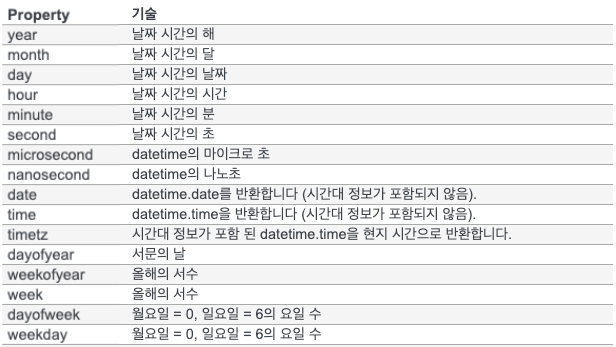

In [8]:
print(ts_dates.year)
print(ts_dates.month)
print(ts_dates.dayofweek)

Index([2023, 2023, 2023], dtype='int32')
Index([1, 2, 3], dtype='int32')
Index([6, 2, 2], dtype='int32')


### df 속성(서브 모듈)
- datetime 타입으로 변환된 column(datetime 타입의 Series 객체)에서 연, 월, 일, 시간 등 정보를 추출하고 싶은 경우 dt 속성을 이용해야 한다.

In [11]:
df = pd.DataFrame({'날짜':['2023-01-01','2023-02-01','2023-03-01'],
                   '매출':[1000,2000,3000]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3 non-null      object
 1   매출      3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [12]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3 non-null      datetime64[ns]
 1   매출      3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 180.0 bytes


In [15]:
# 1월 매출
df[df['날짜'].dt.month == 1]


,날짜,매출
0,2023-01-01,1000


### to_datetime()의 format
- format 속성은 지정한 포맷으로 변경하라는 의미가 아닌, 원본 데이터를 주어진 포맷에 맞춰 해석하여 변경하라는 의미
- format 형식 참고: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [18]:
values = {'dates':['05032023','16032023','28032023'],
          'status': ['Opened','Opened','Closed']
        }
df = pd.DataFrame(values)
df.info()

df['dates'] = pd.to_datetime(df['dates'], format='%d%m%Y')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dates   3 non-null      object
 1   status  3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


,dates,status
0,2023-03-05,Opened
1,2023-03-16,Opened
2,2023-03-28,Closed


In [23]:

values = {'dates':['20230305093000','20230316093000','20230328093000'],
          'status': ['Opened','Opened','Closed']
        }
df = pd.DataFrame(values)
df.info()
# 년 월일 시분초
df['dates'] = pd.to_datetime(df['dates'], format='%Y%m%d%H%M%S')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dates   3 non-null      object
 1   status  3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


,dates,status
0,2023-03-05 09:30:00,Opened
1,2023-03-16 09:30:00,Opened
2,2023-03-28 09:30:00,Closed


### td_period()
- DatetimeIndex 객체를 Period Index 객체로 변환
- freq: 변경하고자 하는 시간 간격

In [24]:
ts_dates

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq=None)

In [26]:
# 일 간격으로 변환
ps = ts_dates.to_period(freq='D')
print(ps)

PeriodIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='period[D]')


In [28]:
# 주 간격으로 변환
# 원본 날짜를 포함한 월~일까지의 주 간격 날짜 데이터 생성
ps = ts_dates.to_period(freq='W')
print(ps)

PeriodIndex(['2022-12-26/2023-01-01', '2023-01-30/2023-02-05',
             '2023-02-27/2023-03-05'],
            dtype='period[W-SUN]')


In [27]:
# 월 간격으로 변환
ps = ts_dates.to_period(freq='M')
print(ps)

PeriodIndex(['2023-01', '2023-02', '2023-03'], dtype='period[M]')


# 12. DateFrame의 연산

### 12.1 Series를 이용한 연산

In [29]:
a = pd.Series(range(1,6), index=list('abcde'))
a

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [31]:
b = pd.Series(range(4,10),index=list('bcedfg'))
b

b    4
c    5
e    6
d    7
f    8
g    9
dtype: int64

In [34]:
# a.add(b)
a+b

a     NaN
b     6.0
c     8.0
d    11.0
e    11.0
f     NaN
g     NaN
dtype: float64

### 12.2 DateFrame을 이용한 연산

In [35]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3),columns=list('ABC'))
df1

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8


In [36]:
df2 = pd.DataFrame(np.arange(16).reshape(4,4),columns=list('ABCD'))
df2

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [39]:
df1 + df2

,A,B,C,D
0,0.0,2.0,4.0,NaN
1,7.0,9.0,11.0,NaN
2,14.0,16.0,18.0,NaN
3,NaN,NaN,NaN,NaN


### 12.3 Series 와 DateFrame 연산

In [40]:
df = pd.DataFrame(np.arange(16).reshape(4,4),columns=list('ABCD'))
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [41]:
s = pd.Series(np.arange(10,14), index=list('ABCD'))
s

A    10
B    11
C    12
D    13
dtype: int64

In [42]:
# DataFrame과 Series를 연산하면 컬럼을 기준으로 브로드캐스팅 된다
df+s

,A,B,C,D
0,10,12,14,16
1,14,16,18,20
2,18,20,22,24
3,22,24,26,28


In [44]:
# df에는 컬럼명이 있으나 Series에는 컬럼명이 없다면,
# 일치하는 컬럼명이 없으므로 브로드 캐스팅이 일어나지도 않으며 데이터가 NaN가 된다
s1 = pd.Series(np.arange(10,14))
df + s1

,A,B,C,D,0,1,2,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 13. 함수매핑

### map 함수의 이용
- map()은 함수와 시퀀스형 데이터를 인자로 받아서 각 요소마다 입력받은 함수를 적용한 후 변환
- 사용방법: map(function, sequence data)

In [45]:
lst = [1,2,3,4,5]
list(map(lambda x: x**2,lst))

[1, 4, 9, 16, 25]

### 13.1.1 map 함수를 Series에 적용

In [49]:
s1 = pd.Series(np.arange(10))
s1

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [48]:
s1.map(lambda x: x**2)

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

데이터 전처리 방법 두가지 : labeling, one-hot encoding

제조사: 삼성(0), 엘지(1) << 요래하는걸 라벨링이라고 한다
명목형 자료들을 숫자형태의 자료로 변경해야 함

단점: 선택값(명목형데이터)가 많을떄 라벨링 처리하기 어려워짐, 희소벡터

### map 함수를 이용한 데이터 수정
- 데이터 전처리중 하나인 labeling 처리 시 사용

In [50]:
dic = {1:'A',2:'B',3:'C'}
s1.map(dic)

0    NaN
1      A
2      B
3      C
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: object

In [52]:
df = pd.read_csv('wages.csv')
df.shape
df.head(10)

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
5,15313.352901,64.53,female,white,15,30
6,47104.171821,61.54,female,white,12,53
7,50960.054282,73.29,male,white,17,50
8,3212.649556,72.24,male,hispanic,15,25
9,42996.637884,72.40,male,white,12,30


In [55]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
df['sex'].value_counts()

sex
female    859
male      520
Name: count, dtype: int64

In [57]:
# 성별을 0,1로 수정
df['sex'] = df['sex'].map({'male':0,'female':1})
# 같은 표현
# df['sex'] = df['sex'].map(lambda x: 0 if x == 'male' else 1)
df.head(10)

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,white,16,49
1,96396.988643,66.23,1,white,16,62
2,48710.666947,63.77,1,white,16,33
3,80478.096153,63.22,1,other,16,95
4,82089.345498,63.08,1,white,17,43
5,15313.352901,64.53,1,white,15,30
6,47104.171821,61.54,1,white,12,53
7,50960.054282,73.29,0,white,17,50
8,3212.649556,72.24,0,hispanic,15,25
9,42996.637884,72.40,0,white,12,30


In [71]:
#race 컬럼 값 라벨링
df = pd.read_csv('wages.csv')
df.head()


,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [73]:
li_race = df['race'].unique()
li_race.sort()
dic_race = { v:i for i,v in enumerate(li_race)}
dic_race

{'black': 0, 'hispanic': 1, 'other': 2, 'white': 3}

In [74]:
df['race'] = df['race'].map(dic_race)
df.head(10)

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,3,16,49
1,96396.988643,66.23,female,3,16,62
2,48710.666947,63.77,female,3,16,33
3,80478.096153,63.22,female,2,16,95
4,82089.345498,63.08,female,3,17,43
5,15313.352901,64.53,female,3,15,30
6,47104.171821,61.54,female,3,12,53
7,50960.054282,73.29,male,3,17,50
8,3212.649556,72.24,male,1,15,25
9,42996.637884,72.40,male,3,12,30


### replace()를 이용한 데이터 수정
- sr.replace(): 정확하게 일치하는 단어를 찾아 바꾼다.
  - 정규표현식에 의해 매칭되는 문자를 찾아 바꾸기 위해서는 regex=True 속성을 지정한다.
- str.replace(): 일부 단어라도 일치하는 단어를 찾아 바꾼다.

In [87]:
df = pd.read_csv('wages.csv')
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [80]:
# df['sex'].replace(['male','female'],[0,1], inplace=True)
df['sex'].replace(['male'],[0], inplace=True)
df['sex'].replace(['female'],[1], inplace=True)
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,white,16,49
1,96396.988643,66.23,1,white,16,62
2,48710.666947,63.77,1,white,16,33
3,80478.096153,63.22,1,other,16,95
4,82089.345498,63.08,1,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,0,white,12,33
1375,24853.519514,61.31,1,white,18,86
1376,13710.671312,63.64,1,white,12,37
1377,95426.014410,71.65,0,white,12,54


In [88]:
df = pd.DataFrame({'Code':np.arange(3),
                   'Name':['(S)Note book','(S)Note book','(S)PC']})
df

,Code,Name
0,0,(S)Note book
1,1,(S)Note book
2,2,(S)PC


In [91]:
# '(S)' -> '(N)'변경
# 정확히 일치하는 것만 바꾸기 떄문에 변견되지 안흔ㄴ다.
df['Name'] = df['Name'].replace('(S)','(M)')
df

,Code,Name
0,0,(M)Note book
1,1,(M)Note book
2,2,(M)PC


In [90]:
# regex = True(default값)로 설정하면 정규표현식에 의해,
# 'S'문자열과 매칭되는 문자열을 '(M)'로 변경하라는 의미 : (S -> ((M))
df['Name'] = df['Name'].str.replace('(S)','(M)',regex=False)
df

,Code,Name
0,0,(M)Note book
1,1,(M)Note book
2,2,(M)PC


### 13.3 apply() 함수의 이용
- DateFrame에 사용자 정의 함수 적용하기

In [95]:
df = pd.read_csv('wages.csv')
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [97]:
# df_sample = df[['earn','height','age']]
df_sample = df.drop(['race','sex','earn'],axis=1)
df_sample.head()

,earn,height,age
0,79571.299011,73.89,49
1,96396.988643,66.23,62
2,48710.666947,63.77,33
3,80478.096153,63.22,95
4,82089.345498,63.08,43


In [98]:
# 각 컬럼의 최대값과 최소값의 차이 계산
df_sample.apply(lambda x: x.max() - x.min())

earn      318047.708444
height        19.870000
age           73.000000
dtype: float64

### 함수 매핑

In [99]:
# 각 컬럼의 최대값과 최소값을 시리즈 객체로 반환
def f(x):
  return pd.Series([x.max(),x.min()],index=['max','min'])

df_sample.apply(f)

,earn,height,age
max,317949.127955,77.21,95
min,-98.580489,57.34,22


# 14. DateFrame 합치기
### 14.1 pd.merge()

In [100]:
df1 = pd.DataFrame({
  '번호': [10,20,30,40,50,60,70],
  '이름': ['홍','임','전','손','저','사','삼']
})
df1

,번호,이름
0,10,홍
1,20,임
2,30,전
3,40,손
4,50,저
5,60,사
6,70,삼


In [102]:
df2 = pd.DataFrame({
  '번호': [10,20,30,40,50,60,70,80],
  '금액': [1000,2000,3000,4000,8000,2000,3000,1111]
})
df2

,번호,금액
0,10,1000
1,20,2000
2,30,3000
3,40,4000
4,50,8000
5,60,2000
6,70,3000
7,80,1111


In [104]:
# 두 DataFrame에서 공통키(PK, FK)가 필요
# inner join
# 'inner' 생략가능
pd.merge(df1,df2,how='inner')

,번호,이름,금액
0,10,홍,1000
1,20,임,2000
2,30,전,3000
3,40,손,4000
4,50,저,8000
5,60,사,2000
6,70,삼,3000


In [108]:
# outer join
pd.merge(df1,df2,how='outer')

,번호,이름,금액
0,10,홍,1000
1,20,임,2000
2,30,전,3000
3,40,손,4000
4,50,저,8000
5,60,사,2000
6,70,삼,3000
7,80,NaN,1111


In [109]:
#왼쪽 데이터 프레임에 있는 컬럼 값 기준으로 병합
pd.merge(df1,df2,how='left')

,번호,이름,금액
0,10,홍,1000
1,20,임,2000
2,30,전,3000
3,40,손,4000
4,50,저,8000
5,60,사,2000
6,70,삼,3000


In [111]:
#오른쪽 데이터 프레임에 있는 컬럼 값 기준으로 병합
pd.merge(df1,df2,how='right')

,번호,이름,금액
0,10,홍,1000
1,20,임,2000
2,30,전,3000
3,40,손,4000
4,50,저,8000
5,60,사,2000
6,70,삼,3000
7,80,NaN,1111


### join on
- 병합을 하고자 하는 데이터 프레임 간 공통키에 해당하는 컬럼이 없을 시 병합하는 방법

In [112]:
df1 = pd.DataFrame({
  '번호': [10,20,30,40,50,60,70],
  '이름': ['홍','임','전','손','저','사','삼'],
  '타입': ['우수','일반','우수','우수','일반','일반','우수'],
})
df1

,번호,이름,타입
0,10,홍,우수
1,20,임,일반
2,30,전,우수
3,40,손,우수
4,50,저,일반
5,60,사,일반
6,70,삼,우수


In [115]:
df2 = pd.DataFrame({
    '고객번호':[10,10,20,40,50,40,40,70,80],
    '금액':[1000,2500,4500,3400,1100,1000,3500,2200,1111]
})
df2

,고객번호,금액
0,10,1000
1,10,2500
2,20,4500
3,40,3400
4,50,1100
5,40,1000
6,40,3500
7,70,2200
8,80,1111


In [116]:
pd.merge(df1,df2,left_on='번호',right_on='고객번호')

,번호,이름,타입,고객번호,금액
0,10,홍,우수,10,1000
1,10,홍,우수,10,2500
2,20,임,일반,20,4500
3,40,손,우수,40,3400
4,40,손,우수,40,1000
5,40,손,우수,40,3500
6,50,저,일반,50,1100
7,70,삼,우수,70,2200
